In [2]:
import numpy as np
import pandas as pd

In [3]:
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

In [4]:
df = pd.read_csv(DATA_URL + "telecom_churn.csv")
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [5]:
# df.columns
# df.shape
# df.nunique()
# df.unique()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

With this same method, we can easily see if there are any **missing values**. Here, there are none because each column contains 3333 observations, the same number of rows we saw before with shape.

We can change the column type with the astype method. Let’s apply this method to the Churn feature to convert it into int64:

In [6]:
df["Churn"] = df["Churn"].astype("int64")
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1      0  
1                       1      0  
2                       0      0  
3                       2      0  
4                       3      0

2850 users out of 3333 are loyal; their Churn value is 0. To calculate **fractions**, pass normalize=True to the value_counts function.

In [7]:
df["Churn"].value_counts(normalize=True)

0    0.855086
1    0.144914
Name: Churn, dtype: float64

## 1. Sorting

In [8]:
df.sort_values(by=["Churn", "Total day charge"], ascending=[True, False]).head()

State  Account length  Area code International plan Voice mail plan  \
688     MN              13        510                 No             Yes   
2259    NC             210        415                 No             Yes   
534     LA              67        510                 No              No   
575     SD             114        415                 No             Yes   
2858    AL             141        510                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
688                      21              315.6              105   
2259                     31              313.8               87   
534                       0              310.4               97   
575                      36              309.9               90   
2858                     28              308.0              123   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
688              53.65              208.9               71             17.76   
2259             53.35              147.7              103             12.55   
534              52.77               66.5              123              5.65   
575              52.68              200.3               89             17.03   
2858             52.36              247.8              128             21.06   

      Total night minutes  Total night calls  Total night charge  \
688                 260.1                123               11.70   
2259                192.7                 97                8.67   
534                 246.5                 99               11.09   
575                 183.5                105                8.26   
2858                152.9                103                6.88   

      Total intl minutes  Total intl calls  Total intl charge  \
688                 12.1                 3               3.27   
2259                10.1                 7               2.73   
534                  9.2                10               2.48   
575                 14.2                 2               3.83   
2858                 7.4                 3               2.00   

      Customer service calls  Churn  
688                        3      0  
2259                       3      0  
534                        4      0  
575                        1      0  
2858                       1      0

##  2.Indexing and retrieving data

To get a single column, you can use a DataFrame['Name'] construction. Let’s use this to answer a question about that column alone: what is the proportion of churned users in our dataframe?

In [9]:
df["Churn"].mean()

0.14491449144914492

14.5% is actually quite bad for a company; such a churn rate can make the company go bankrupt.

In [10]:
df[df["Churn"] == 1].mean()

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Account length            102.664596
Area code                 437.817805
Number vmail messages       5.115942
Total day minutes         206.914079
Total day calls           101.335404
Total day charge           35.175921
Total eve minutes         212.410145
Total eve calls           100.561077
Total eve charge           18.054969
Total night minutes       205.231677
Total night calls         100.399586
Total night charge          9.235528
Total intl minutes         10.700000
Total intl calls            4.163561
Total intl charge           2.889545
Customer service calls      2.229814
Churn                       1.000000
dtype: float64

What is the maximum length of international calls among loyal users (Churn == 0) who do not have an international plan?

In [11]:
df[(df["Churn"] == 0) & (df["International plan"] == "No")]["Total intl minutes"].max()

18.9

In the first case below, we say “give us the values of the rows with index from 0 to 5 (inclusive) and columns labeled from State to Area code (inclusive)”. 

In the second case, we say “give us the values of the first five rows in the first three columns” (as in a typical Python slice: the maximal value is not included).

In [12]:
df.loc[0:5, "State":"Area code"]

State  Account length  Area code
0    KS             128        415
1    OH             107        415
2    NJ             137        415
3    OH              84        408
4    OK              75        415
5    AL             118        510

## 3. Applying Functions to Cells, Columns and Rows

In [13]:
df.apply(np.max)

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes       395.0
Total night calls           175
Total night charge        17.77
Total intl minutes         20.0
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                         1
dtype: object

The apply method can also be used to apply a function to each row. To do this, specify **axis=1**. 

Lambda functions are very convenient in such scenarios. For example, if we need to select all states starting with ‘W’, we can do it like this:

In [14]:
df[df["State"].apply(lambda state: state[0] == "W")].head()

State  Account length  Area code International plan Voice mail plan  \
9     WV             141        415                Yes             Yes   
26    WY              57        408                 No             Yes   
44    WI              64        510                 No              No   
49    WY              97        415                 No             Yes   
54    WY              87        415                 No              No   

    Number vmail messages  Total day minutes  Total day calls  \
9                      37              258.6               84   
26                     39              213.0              115   
44                      0              154.0               67   
49                     24              133.2              135   
54                      0              151.0               83   

    Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
9              43.96              222.0              111             18.87   
26             36.21              191.1              112             16.24   
44             26.18              225.8              118             19.19   
49             22.64              217.2               58             18.46   
54             25.67              219.7              116             18.67   

    Total night minutes  Total night calls  Total night charge  \
9                 326.4                 97               14.69   
26                182.7                115                8.22   
44                265.3                 86               11.94   
49                 70.6                 79                3.18   
54                203.9                127                9.18   

    Total intl minutes  Total intl calls  Total intl charge  \
9                 11.2                 5               3.02   
26                 9.5                 3               2.57   
44                 3.5                 3               0.95   
49                11.0                 3               2.97   
54                 9.7                 3               2.62   

    Customer service calls  Churn  
9                        0      0  
26                       0      0  
44                       1      0  
49                       1      0  
54                       5      1

The map method can be used to replace values in a column by passing a dictionary of the form {old_value: new_value} as its argument:

In [15]:
d = {"No": False, "Yes": True}
df["International plan"] = df["International plan"].map(d)
df.head()

State  Account length  Area code  International plan Voice mail plan  \
0    KS             128        415               False             Yes   
1    OH             107        415               False             Yes   
2    NJ             137        415               False              No   
3    OH              84        408                True              No   
4    OK              75        415                True              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1      0  
1                       1      0  
2                       0      0  
3                       2      0  
4                       3      0

## 4. Grouping

In [16]:
columns_to_show = ["Total day minutes", "Total eve minutes", "Total night minutes"]
df.groupby(["Churn"])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

Total day minutes                        Total eve minutes             \
                   mean        std amin   amax              mean        std   
Churn                                                                         
0            175.175754  50.181655  0.0  315.6        199.043298  50.292175   
1            206.914079  68.997792  0.0  350.8        212.410145  51.728910   

                   Total night minutes                          
       amin   amax                mean        std  amin   amax  
Churn                                                           
0       0.0  361.8          200.133193  51.105032  23.2  395.0  
1      70.9  363.7          205.231677  47.132825  47.4  354.9

## 5. Summary tables

Suppose we want to see how the observations in our dataset are distributed in the context of two variables - Churn and International plan. To do so, we can build a contingency table using the **crosstab method**:

In [17]:
# pd.crosstab(df["Churn"], df["International plan"])
pd.crosstab(df["Churn"], df["Voice mail plan"], normalize=True)

Voice mail plan        No       Yes
Churn                              
0                0.602460  0.252625
1                0.120912  0.024002

This will resemble pivot tables to those familiar with Excel. And, of course, pivot tables are implemented in Pandas: the pivot_table method takes the following parameters:

- values – a list of variables to calculate statistics for,

- index – a list of variables to group data by,

- aggfunc – what statistics we need to calculate for groups, ex. sum, mean, maximum, minimum or something else.

In [18]:
# Let’s take a look at the average number of day, evening, and night calls by area code:

df.pivot_table(
    ["Total day calls", "Total eve calls", "Total night calls"],
    ["Area code"],
    aggfunc="mean",
)


Total day calls  Total eve calls  Total night calls
Area code                                                     
408             100.496420        99.788783          99.039379
415             100.576435       100.503927         100.398187
510             100.097619        99.671429         100.601190

## 6. DataFrame transformations

Like many other things in Pandas, adding columns to a DataFrame is doable in many ways.

In [19]:
# t is possible to add a column more easily without creating an intermediate Series instance:

df["Total charge"] = (
    df["Total day charge"]
    + df["Total eve charge"]
    + df["Total night charge"]
    + df["Total intl charge"]
)
df.head()

State  Account length  Area code  International plan Voice mail plan  \
0    KS             128        415               False             Yes   
1    OH             107        415               False             Yes   
2    NJ             137        415               False              No   
3    OH              84        408                True              No   
4    OK              75        415                True              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  ...  Total eve charge  \
0             45.07              197.4  ...             16.78   
1             27.47              195.5  ...             16.62   
2             41.38              121.2  ...             10.30   
3             50.90               61.9  ...              5.26   
4             28.34              148.3  ...             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  Total charge  
0                       1      0         75.56  
1                       1      0         59.24  
2                       0      0         62.29  
3                       2      0         66.80  
4                       3      0         52.09  

[5 rows x 21 columns]

To delete columns or rows, use the **drop method**, passing the required indexes and the axis parameter (1 if you delete columns, and nothing or 0 if you delete rows). 

The **inplace argument** tells whether to change the original DataFrame. With inplace=False, the drop method doesn’t change the existing DataFrame and returns a new one with dropped rows or columns. With inplace=True, it alters the DataFrame.

In [20]:
# get rid of just created columns
df.drop(["Total charge"], axis=1, inplace=True)
# and here’s how you can delete rows
df.drop([1, 2]).head()

State  Account length  Area code  International plan Voice mail plan  \
0    KS             128        415               False             Yes   
3    OH              84        408                True              No   
4    OK              75        415                True              No   
5    AL             118        510                True              No   
6    MA             121        510               False             Yes   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
3                      0              299.4               71   
4                      0              166.7              113   
5                      0              223.4               98   
6                     24              218.2               88   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   
5             37.98              220.6              101             18.75   
6             37.09              348.5              108             29.62   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
3                196.9                 89                8.86   
4                186.9                121                8.41   
5                203.9                118                9.18   
6                212.6                118                9.57   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   
5                 6.3                 6               1.70   
6                 7.5                 7               2.03   

   Customer service calls  Churn  
0                       1      0  
3                       2      0  
4                       3      0  
5                       0      0  
6                       3      0

# First attempt at predicting telecom churn

In [21]:
pd.crosstab(df["Churn"], df["International plan"], margins=True)

International plan  False  True   All
Churn                                
0                    2664   186  2850
1                     346   137   483
All                  3010   323  3333

In [22]:
# some imports to set up plotting
import matplotlib.pyplot as plt
# !pip install seaborn
import seaborn as sns

# import some nice vis settings
sns.set()
# Graphics in the Retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

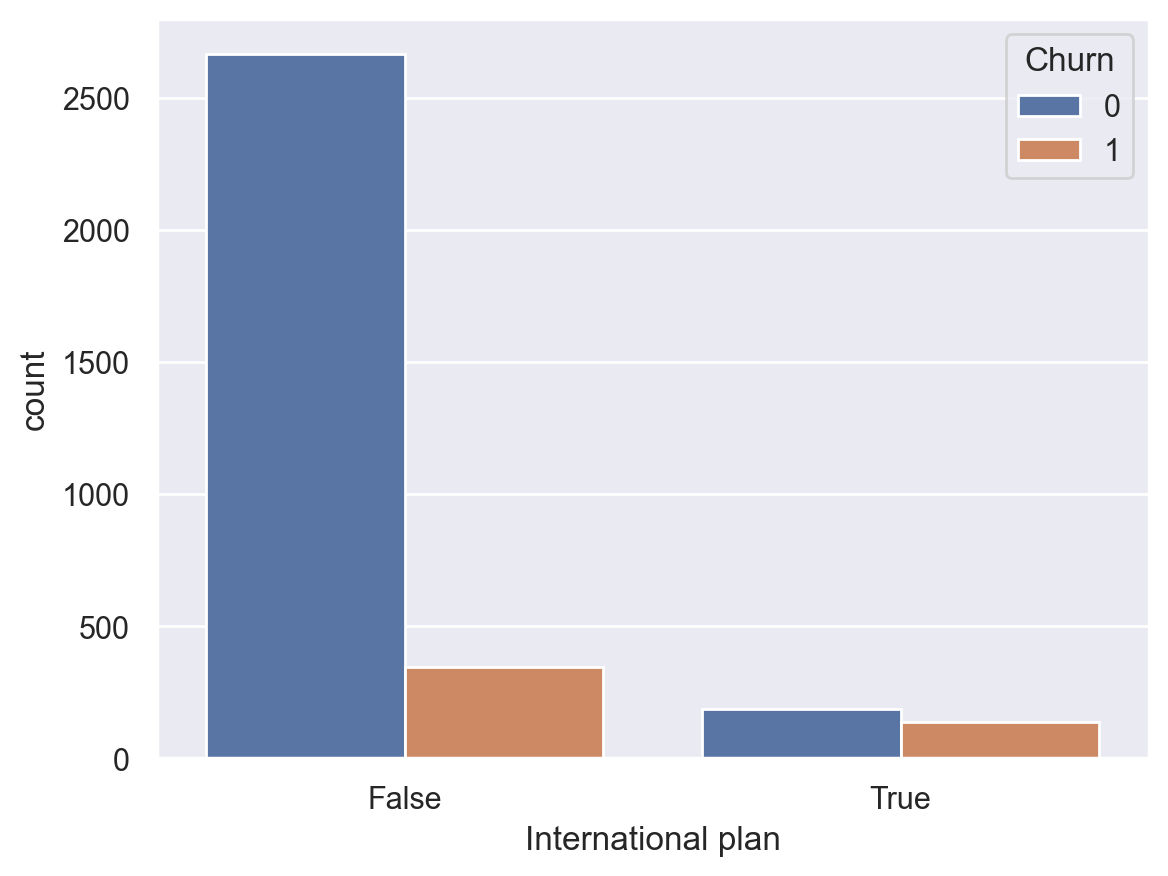

In [23]:
sns.countplot(x="International plan", hue="Churn", data=df);

We see that, with International Plan, the churn rate is much higher, which is an interesting observation! Perhaps large and poorly controlled expenses with international calls are very conflict-prone and lead to dissatisfaction among the telecom operator’s customers.

In [24]:
pd.crosstab(df["Churn"], df["Customer service calls"], margins=True)

Customer service calls    0     1    2    3    4   5   6  7  8  9   All
Churn                                                                  
0                       605  1059  672  385   90  26   8  4  1  0  2850
1                        92   122   87   44   76  40  14  5  1  2   483
All                     697  1181  759  429  166  66  22  9  2  2  3333

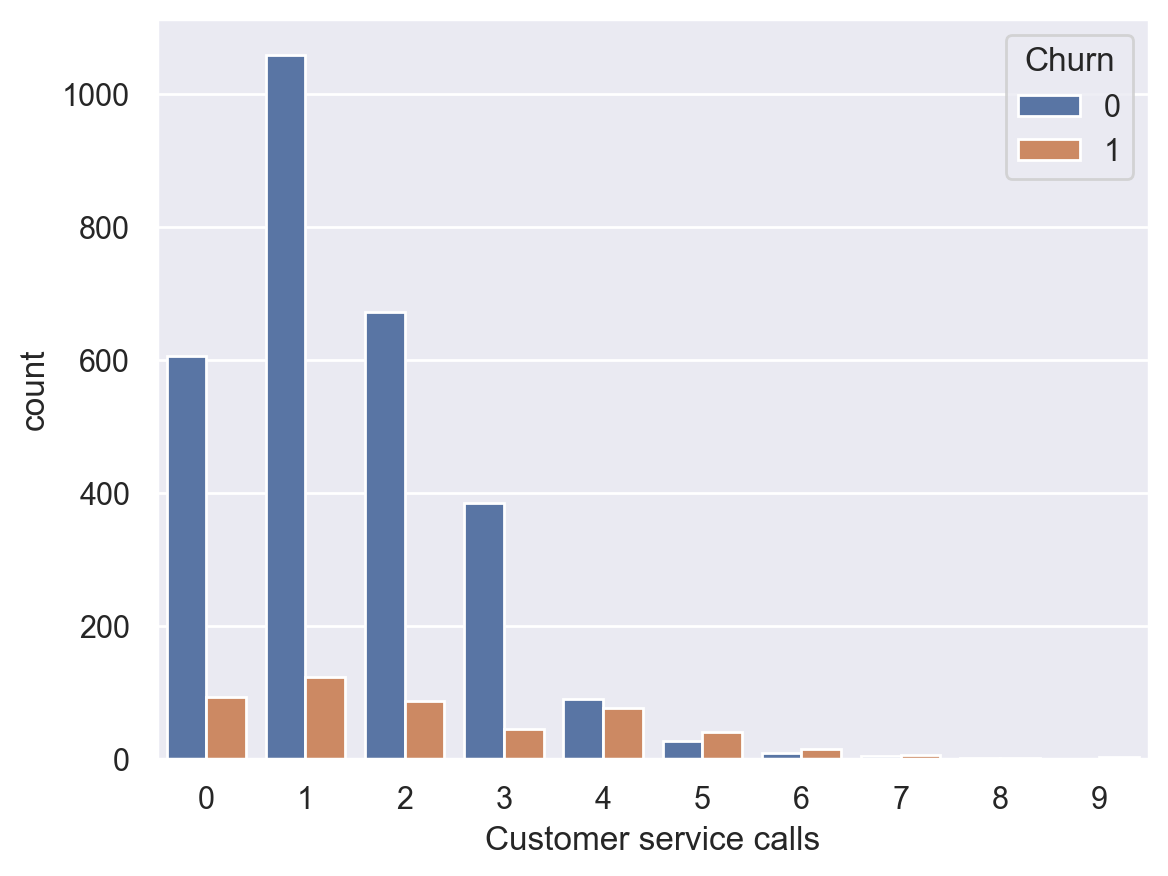

In [25]:
sns.countplot(x="Customer service calls", hue="Churn", data=df);

Although it’s not so obvious from the summary table, it’s easy to see from the above plot that the churn rate increases sharply from 4 customer service calls and above.

Now let’s add a binary feature to our DataFrame – Customer service calls > 3. And once again, let’s see how it relates to churn.

In [26]:
df["Many_service_calls"] = (df["Customer service calls"] > 3).astype("int")

pd.crosstab(df["Many_service_calls"], df["Churn"], margins=True)

Churn                  0    1   All
Many_service_calls                 
0                   2721  345  3066
1                    129  138   267
All                 2850  483  3333

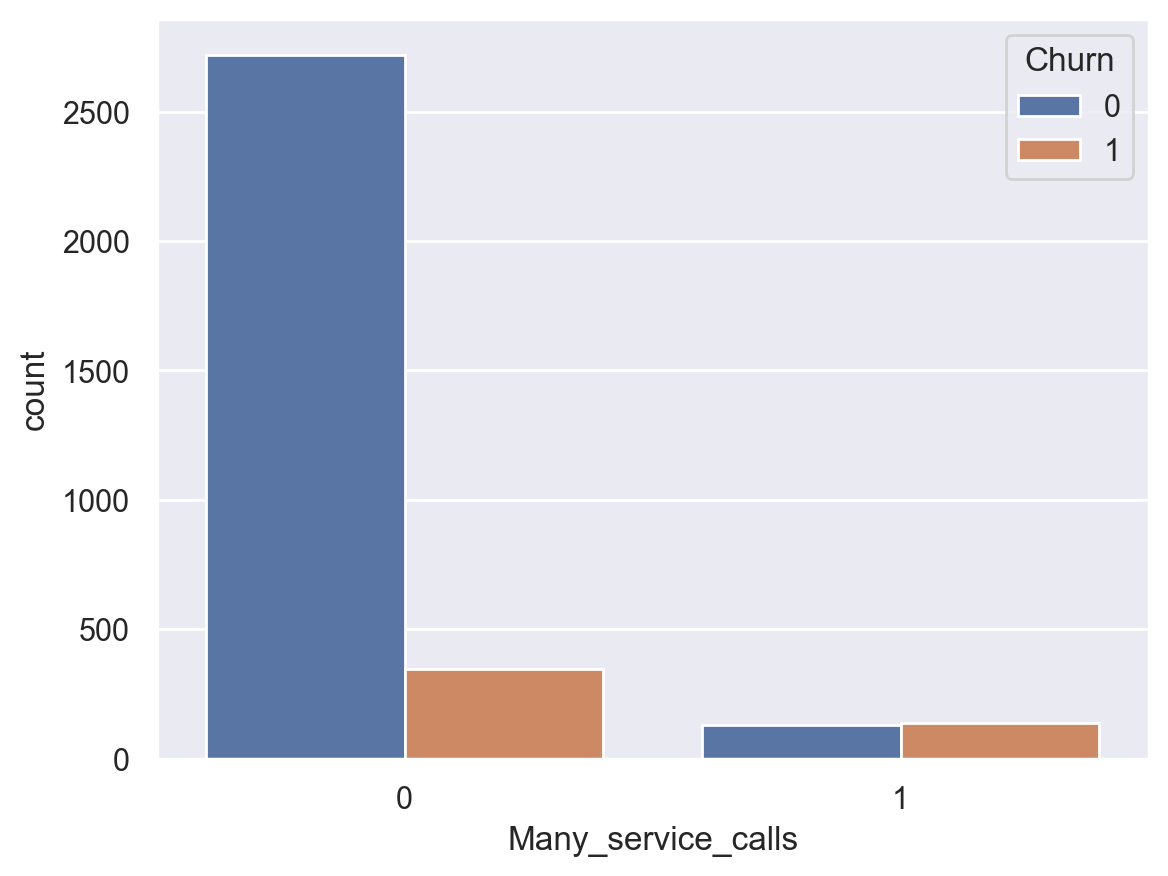

In [27]:
sns.countplot(x="Many_service_calls", hue="Churn", data=df);

Let’s construct another contingency table that relates Churn with both International plan and freshly created Many_service_calls.

In [28]:
pd.crosstab(df["Many_service_calls"] & df["International plan"], df["Churn"])

Churn     0    1
row_0           
False  2841  464
True      9   19

<AxesSubplot:xlabel='Customer service calls', ylabel='Churn'>

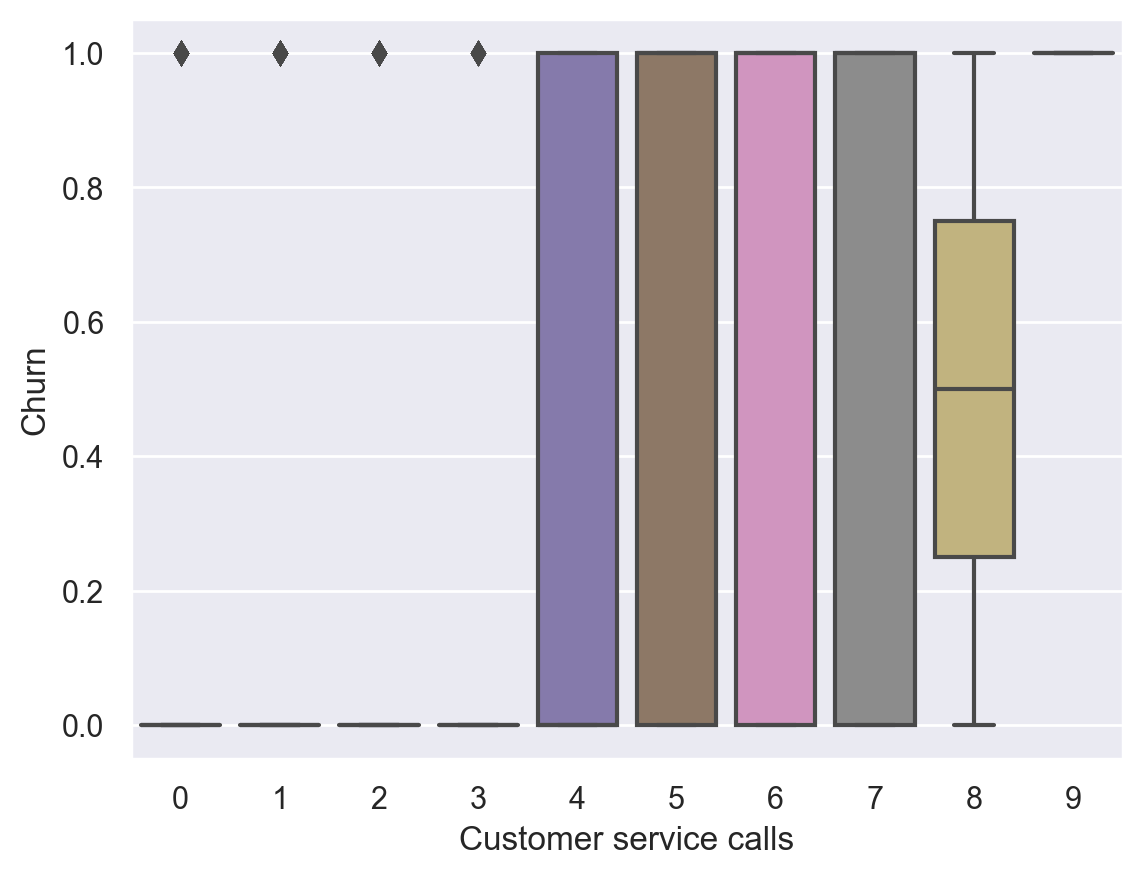

In [35]:
import seaborn as sns
sns.boxplot(x = 'Customer service calls', y = 'Churn', data = df)

In [29]:
df.head()


State  Account length  Area code  International plan Voice mail plan  \
0    KS             128        415               False             Yes   
1    OH             107        415               False             Yes   
2    NJ             137        415               False              No   
3    OH              84        408                True              No   
4    OK              75        415                True              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  ...  Total eve charge  \
0             45.07              197.4  ...             16.78   
1             27.47              195.5  ...             16.62   
2             41.38              121.2  ...             10.30   
3             50.90               61.9  ...              5.26   
4             28.34              148.3  ...             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  Many_service_calls  
0                       1      0                   0  
1                       1      0                   0  
2                       0      0                   0  
3                       2      0                   0  
4                       3      0                   0  

[5 rows x 21 columns]

As we move on through this course, recall that, before the advent of machine learning, the data analysis process looked something like this. Let’s recap what we’ve covered:

The share of loyal clients in the dataset is 85.5%. The most naive model that always predicts a “loyal customer” on such data will guess right in about 85.5% of all cases. That is, the proportion of correct answers (accuracy) of subsequent models should be no less than this number, and will hopefully be significantly higher;

With the help of a simple prediction that can be expressed by the following formula: International plan = True & Customer Service calls > 3 => Churn = 1, else Churn = 0, we can expect a guessing rate of 85.8%, which is just above 85.5%. Subsequently, we’ll talk about decision trees and figure out how to find such rules automatically based only on the input data;

We got these two baselines without applying machine learning, and they’ll serve as the starting point for our subsequent models. If it turns out that with enormous effort, we increase accuracy by only 0.5%, persay, then possibly we are doing something wrong, and it suffices to confine ourselves to a simple “if-else” model with two conditions;

Before training complex models, it is recommended to wrangle the data a bit, make some plots, and check simple assumptions. Moreover, in business applications of machine learning, they usually start with simple solutions and then experiment with more complex ones.